# Red Neuronal con Keras 

## Compuertas XOR

|Entradas en XOR|Salida|
|---------------|------|
|(0, 0)|0|
|(0, 1)|1|
|(1, 0)|1|
|(1, 1)|0|
|(0, 0, 0)|0|
|(0, 0, 1)|1|
|(0, 1, 0)|1|
|(0, 1, 1)|0|
|(1, 0, 0)|1|
|(1, 0, 1)|0|
|(1, 1, 0)|0|
|(1, 1, 1)|1|

### Programación clásica de una compuerta XOR

In [1]:
def predecir_XOR(entrada1, entrada2):
    if (entrada1 == 0 and entrada2 == 0):
        return 0
    elif (entrada1 == 0 and entrada2 == 1):
        return 1
    elif (entrada1 == 1 and entrada2 == 0):
        return 1
    elif (entrada1 == 1 and entrada2 == 1):
        return 0

In [4]:
predecir_XOR(0, 0)
predecir_XOR(0, 1)
predecir_XOR(1, 0)
predecir_XOR(1, 1)

0

## Importar las librerías necesarias

In [5]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense

%matplotlib inline

## Crear los array de I/O

Cargamos las 4 combinaciones de las compuestas XOR

In [6]:
training_data = np.array([[0,0], [0,1], [1,0], [1,1]], 'float32')

Y luego se cargan los resultados en el mismo orden

In [7]:
target_data = np.array([[0], [1], [1], [0]], 'float32')

## Crear la arquitectura de nuestra red neuronal

Lo primero es crear un modelo vacio de tipo Sequential. Este modelo se refiere a que crearemos una serie de capas de neuronas secuenciales (una delante de la otra)

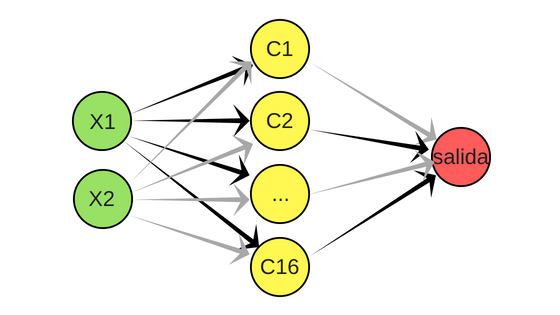

In [8]:
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Con lo anterior, se le ha dicho que la capa de entrada sea de 2 neuronas y una capa oculta de 16 neuronas con un método de activación llamado ***ReLu***. Mientras que la capa de salida sea de una neurona y con una función de activación ***sigmoid***.

ReLU hace referencia a *Rectified Linear Unit*, el cual es una función de activación más uada en modelos de Deep Learning. La función retorna 0 si recibe alguna entrada negativa, pero para cualquier valor positivo X devuelve ese valor. Entonces se puede escribir de la siguiente manera:

$$ f(x) = max(0, x) $$

De manera gráfica podemos observar los siguiente:

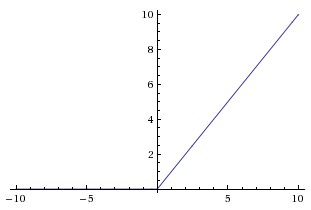

## Entrenar la Red

El método de optimizador Adam, es un método de descenso del gradiente estocástico que esta basado en una estimación adaptativa de primer orden a momentos de segundo orden. De acuero a Kingma, el método is computacionalmente eficiente, tiene pocos requerimiento de memoria, es invariante al reajuste diagonal de gradientes y es muy adecuado para problemas que son grandes en términos de datos y parámetros. 

In [9]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])
model.fit(training_data, target_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 13s 13s/step - loss: 0.2569 - binary_accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2566 - binary_accuracy: 0.2500
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2563 - binary_accuracy: 0.2500
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2560 - binary_accuracy: 0.2500
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2557 - binary_accuracy: 0.2500
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2554 - binary_accuracy: 0.2500
Epoch 7/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2551 - binary_accuracy: 0.2500
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2548 - binary_accuracy: 0.2500
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2545 - binary_accuracy: 0.2500
Epoch 10/1000
1/1 [==============================] - 

## Evaluar la red neuronal y predecir

In [10]:
scores = model.evaluate(training_data, target_data)
print('\n%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

1/1 [==============================] - 1s 571ms/step - loss: 0.0348 - binary_accuracy: 1.0000

binary_accuracy: 100.00%


## Guardar la red

Serializar el modelo a JSON

In [11]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

Serializar los pesos a HDF5

In [12]:
model.save_weights('model.h5')
print('Modelo Guardado')

Modelo Guardado


## Cargar el modelo

In [13]:
from keras.models import model_from_json

Cargar el json y crear el modelo

In [14]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

Cargar los pesos al nuevo modelo

In [15]:
loaded_model.load_weights('model.h5')
print('Modelo cargado desde el disco')

Modelo cargado desde el disco


Compilar modelo cargado y listo para usar

In [16]:
loaded_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])